In [2]:
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [3]:
df = pd.read_csv('MS_Dhoni_ODI_record.csv')

print(df.head())
print(df.tail())

  score runs_scored balls_faced strike_rate fours sixes    opposition  \
0     0           0           1           0     0     0  v Bangladesh   
1    12          12          11      109.09     2     0  v Bangladesh   
2    7*           7           2         350     0     1  v Bangladesh   
3     3           3           7       42.85     0     0    v Pakistan   
4   148         148         123      120.32    15     4    v Pakistan   

          ground        date  odi_number  
0     Chattogram  23/12/2004  ODI # 2199  
1          Dhaka  26/12/2004  ODI # 2201  
2          Dhaka  27/12/2004  ODI # 2202  
3          Kochi  02/04/2005  ODI # 2235  
4  Visakhapatnam  05/04/2005  ODI # 2236  
    score runs_scored balls_faced strike_rate fours sixes     opposition  \
345   56*          56          61        91.8     3     2  v West Indies   
346   42*          42          31      135.48     4     1      v England   
347    35          35          33      106.06     4     0   v Bangladesh   

In [4]:
#data cleaning process - 1

df['opposition'] = df['opposition'].str.replace('v','', regex = False)
print(df['opposition'])

0        Bangladesh
1        Bangladesh
2        Bangladesh
3          Pakistan
4          Pakistan
           ...     
345     West Indies
346         England
347      Bangladesh
348       Sri Lanka
349     New Zealand
Name: opposition, Length: 350, dtype: object


In [5]:
#data cleaning process - 2
print(df.columns)
df.drop(columns = 'odi_number', inplace=True)
print(df.columns)

Index(['score', 'runs_scored', 'balls_faced', 'strike_rate', 'fours', 'sixes',
       'opposition', 'ground', 'date', 'odi_number'],
      dtype='object')
Index(['score', 'runs_scored', 'balls_faced', 'strike_rate', 'fours', 'sixes',
       'opposition', 'ground', 'date'],
      dtype='object')


In [ ]:
#to create notout columns
df['score'] = df['score'].apply(str)
df['not_out'] = np.where(df['score'].str.endswith('*'), 1,0)


#Filter out inning where Dhoni did not bat/Team did not bat
df_new = df.loc[((df['score'] != 'DNB') & (df['score'] != 'TDNB')), 'runs_scored':]

#Fixing data types
df_new['runs_scored'] = df_new['runs_scored'].astype(int)
df_new['balls_faced'] = df_new['balls_faced'].astype(int)
df_new['strike_rate'] = df_new['strike_rate'].astype(float)
df_new['fours'] = df_new['fours'].astype(int)
df_new['sixes'] = df_new['sixes'].astype(int)


df_new.info()

First Match:  December 23, 2004
Last Match:  July 09, 2019
<class 'pandas.core.frame.DataFrame'>
Index: 297 entries, 0 to 349
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   runs_scored  297 non-null    int64         
 1   balls_faced  297 non-null    int64         
 2   strike_rate  297 non-null    float64       
 3   fours        297 non-null    int64         
 4   sixes        297 non-null    int64         
 5   opposition   297 non-null    object        
 6   ground       297 non-null    object        
 7   date         297 non-null    datetime64[ns]
 8   not_out      297 non-null    int64         
dtypes: datetime64[ns](1), float64(1), int64(5), object(2)
memory usage: 23.2+ KB


In [22]:
#Career Stats
df_new['date'] = pd.to_datetime(df_new['date'], dayfirst = True)
first_match_date = df_new['date'].dt.date.min().strftime('%B %d, %Y')
print('First Match: ', first_match_date)

last_match_date = df_new['date'].dt.date.max().strftime('%B %d, %Y')
print('Last Match: ',last_match_date)

First Match:  December 23, 2004
Last Match:  July 09, 2019


In [ ]:
number_of_matches = df.shape[0]
print('Number of matches played : ', number_of_matches)

number_of_inns = df_new.shape[0]
print('Number of innings played are: ', number_of_inns)

not_outs = df_new['not_out'].sum()
print("Number of times he was notout is: ", not_outs)

runs_scored = df_new['runs_scored'].sum()
print('runs_scored by him was ', runs_scored)

balls_faced = df_new['balls_faced'].sum()
print('Number of balls faced by him was ', balls_faced)

career_sr = (runs_scored / balls_faced) * 100
print('Career strike rate was: {:.2f}'.format(career_sr)) #display upto 2 decimal places

career_avg = (runs_scored/(number_of_inns - not_outs))
print('Career average is: {:.2f}'.format(career_avg))

hundreds = (df_new['runs_scored'] >= 100).sum()
print('Number of hundreds : ', hundreds)

fifties = ((df_new['runs_scored'] >= 50) & (df_new['runs_scored'] <100))

Number of matches played :  350
Number of innings played are:  297
Number of times he was notout is:  84
runs_scored by him was  10773
Number of balls faced by him was  12303
Career strike rate was: 87.56
Career average is: 50.58
Number of hundreds :  10


opposition
Sri Lanka       67
Australia       55
England         48
West Indies     39
South Africa    37
Pakistan        36
New Zealand     28
Bangladesh      21
Zimbabwe         6
Africa XI        3
Hong Kong        2
Afghanistan      2
Ireland          2
Scotland         1
Bermuda          1
Netherlands      1
U.A.E.           1
Name: count, dtype: int64


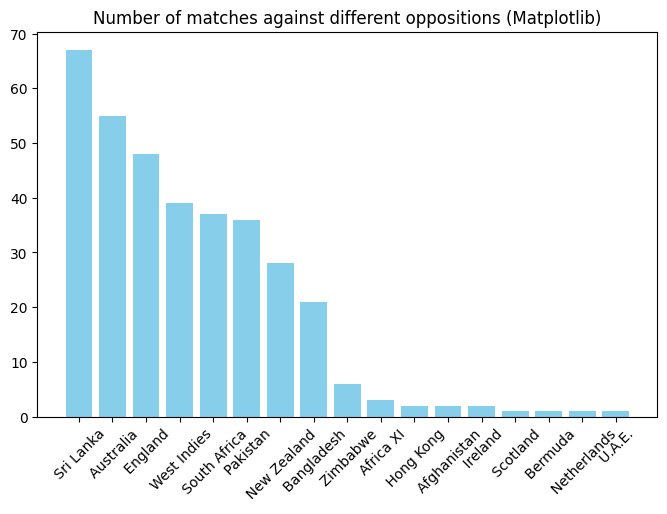

In [28]:
#Matches against different
opposition_counts = df['opposition'].value_counts()
print(opposition_counts)

#Matplotlib bar plot
plt.figure(figsize = (8,5))
plt.bar(opposition_counts.index, opposition_counts.values, color = 'skyblue')
plt.title('Number of matches against different oppositions (Matplotlib)')
plt.xticks(rotation = 45)
plt.show()

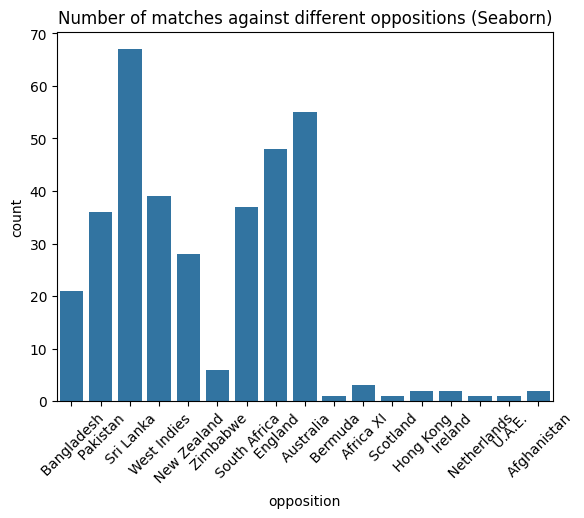

In [29]:
#Seaborn version

sns.countplot(x='opposition', data = df)
plt.title('Number of matches against different oppositions (Seaborn)')
plt.xticks(rotation = 45)
plt.show()

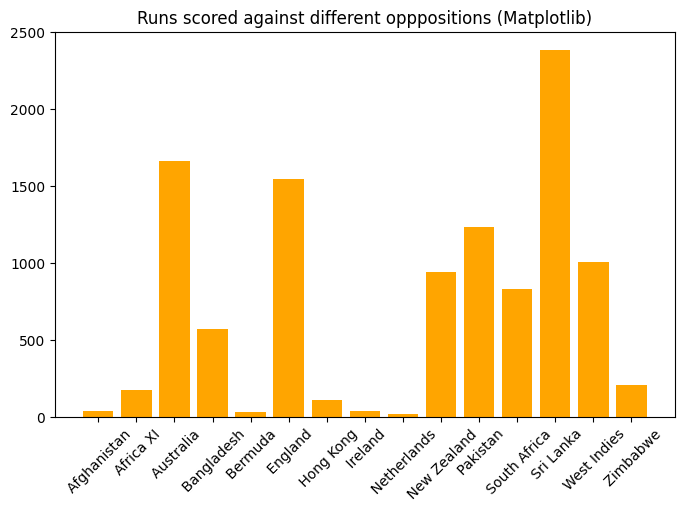

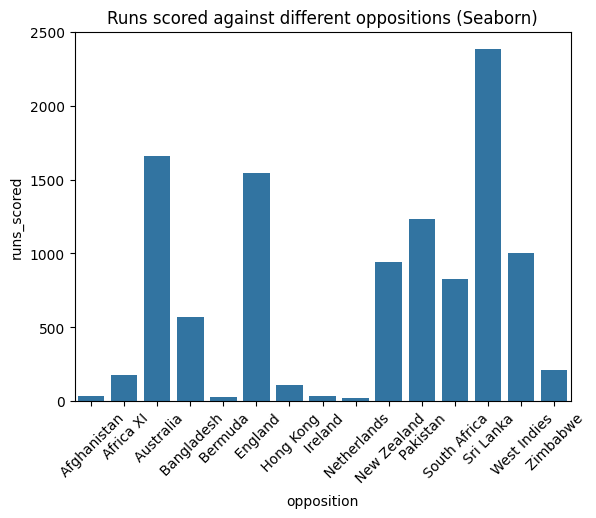

In [32]:
#Runs Scored against each team 
runs_scored_by_opposition = df_new.groupby('opposition')['runs_scored'].sum().reset_index()
#Matplotlib
plt.figure(figsize=(8,5))
plt.bar(runs_scored_by_opposition['opposition'],runs_scored_by_opposition['runs_scored'], color = 'orange')
plt.title('Runs scored against different opppositions (Matplotlib)')
plt.xticks(rotation = 45)
plt.show()

#SeaBorn
sns.barplot(x = 'opposition', y = 'runs_scored', data = runs_scored_by_opposition)
plt.title('Runs scored against different oppositions (Seaborn)')
plt.xticks(rotation = 45)
plt.show()